In [1]:
%cd ../data

/home/explorer/BMS270/data


In [2]:
import numpy as np

In [3]:
def clip(s):
    return max(0,int(float(s)+.5))

In [5]:
!wget 'http://histo.ucsf.edu/BMS270/BMS270_2019/data/GSE88801_kallisto_est_counts_thresh10.cdt'

--2019-05-23 14:01:48--  http://histo.ucsf.edu/BMS270/BMS270_2019/data/GSE88801_kallisto_est_counts_thresh10.cdt
Resolving histo.ucsf.edu (histo.ucsf.edu)... 10.37.29.26
Connecting to histo.ucsf.edu (histo.ucsf.edu)|10.37.29.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4469852 (4.3M) [image/x-coreldrawtemplate]
Saving to: ‘GSE88801_kallisto_est_counts_thresh10.cdt.1’

GSE88801_kallisto_e 100%[===================>]   4.26M  2.73MB/s    in 1.6s    

2019-05-23 14:01:50 (2.73 MB/s) - ‘GSE88801_kallisto_est_counts_thresh10.cdt.1’ saved [4469852/4469852]



In [4]:
from csv import reader, excel_tab
orfs = []
names = []
data = []
fin = reader(open("GSE88801_kallisto_est_counts_thresh10.cdt"),dialect=excel_tab)
header = next(fin)[4:]
eweights = next(fin)[4:]
for row in fin:
    orfs.append(row[1])
    names.append(row[2])
    data.append([clip(i) for i in row[4:]])

In [9]:
C[0,:10],C[-1,:10]

(array([3348, 3926, 2263, 4959, 2869, 3900, 3369, 2182, 3281, 3282]),
 array([ 175,  413,  154,  764,  132,  562,  150,  546,  138, 1176]))

In [10]:
!diff -q sample_table.csv sample_table_v2.csv

Files sample_table.csv and sample_table_v2.csv differ


In [6]:
C = np.array(data)
C.shape

(9939, 36)

In [8]:
!ls sample_table_v2.csv

sample_table_v2.csv


In [11]:
!wget 'http://histo.ucsf.edu/BMS270/BMS270_2019/data/sample_table_v2.csv'

--2019-05-23 14:16:10--  http://histo.ucsf.edu/BMS270/BMS270_2019/data/sample_table_v2.csv
Resolving histo.ucsf.edu (histo.ucsf.edu)... 10.37.29.26
Connecting to histo.ucsf.edu (histo.ucsf.edu)|10.37.29.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1064 (1.0K) [text/csv]
Saving to: ‘sample_table_v2.csv.1’

sample_table_v2.csv 100%[===================>]   1.04K  --.-KB/s    in 0s      

2019-05-23 14:16:10 (139 MB/s) - ‘sample_table_v2.csv.1’ saved [1064/1064]



In [12]:
fp = reader(open("sample_table_v2.csv"))
sample_header = next(fp)
samples = []
name2sample = {}
for i in fp:
    samples.append(i)
    name2sample[i[0]] = i

In [13]:
!head sample_table_v2.csv

In [14]:
header[:5]

['GSM2348268', 'GSM2348271', 'GSM2348274', 'GSM2348277', 'GSM2348280']

In [15]:
out = open("sample_table_v2.tdt","w")
out.write("\t".join(sample_header+["state"])+"\n")
for i in header:
    s = name2sample[i]
    out.write("\t".join(s + ["%s.%s.%s" % (s[2],s[1],s[3])])+"\n")
out.close()

In [16]:
!head sample_table_v2.tdt

name	infection	strain	time	replicate	state
GSM2348268	Live	BMDM	4	1	BMDM.Live.4
GSM2348271	Live	BMDM	24	1	BMDM.Live.24
GSM2348274	Live	BMDM	4	2	BMDM.Live.4
GSM2348277	Live	BMDM	24	2	BMDM.Live.24
GSM2348280	Live	BMDM	4	3	BMDM.Live.4
GSM2348283	Live	BMDM	24	3	BMDM.Live.24
GSM2348267	Dead	BMDM	4	1	BMDM.Dead.4
GSM2348270	Dead	BMDM	24	1	BMDM.Dead.24
GSM2348273	Dead	BMDM	4	2	BMDM.Dead.4


In [17]:
out = open("GSE88801_kallisto_est_counts_thresh10.txt","w")
out.write("\t".join(["gene"]+header)+"\n")
for (name,row) in zip(names,C):
    out.write("\t".join([name]+[str(i) for i in row])+"\n")
out.close()

In [18]:
%load_ext rpy2.ipython

In [19]:
%%R
library(limma)
library(edgeR)

In [20]:
%%R
samples <- read.delim("sample_table_v2.tdt")
print(summary(samples))

         name         infection   strain        time      replicate
 GSM2348248: 1   Dead      :12   BMDM:18   Min.   : 4   Min.   :1  
 GSM2348249: 1   Live      :12   J774:18   1st Qu.: 4   1st Qu.:1  
 GSM2348250: 1   uninfected:12             Median :14   Median :2  
 GSM2348251: 1                             Mean   :14   Mean   :2  
 GSM2348252: 1                             3rd Qu.:24   3rd Qu.:3  
 GSM2348253: 1                             Max.   :24   Max.   :3  
 (Other)   :30                                                     
                state   
 BMDM.Dead.24      : 3  
 BMDM.Dead.4       : 3  
 BMDM.Live.24      : 3  
 BMDM.Live.4       : 3  
 BMDM.uninfected.24: 3  
 BMDM.uninfected.4 : 3  
 (Other)           :18  


In [21]:
%%R
state <- samples$state

d <- model.matrix(~0+state)
colnames(d) <- gsub("state","",colnames(d))
print(colnames(d))

 [1] "BMDM.Dead.24"       "BMDM.Dead.4"        "BMDM.Live.24"      
 [4] "BMDM.Live.4"        "BMDM.uninfected.24" "BMDM.uninfected.4" 
 [7] "J774.Dead.24"       "J774.Dead.4"        "J774.Live.24"      
[10] "J774.Live.4"        "J774.uninfected.24" "J774.uninfected.4" 


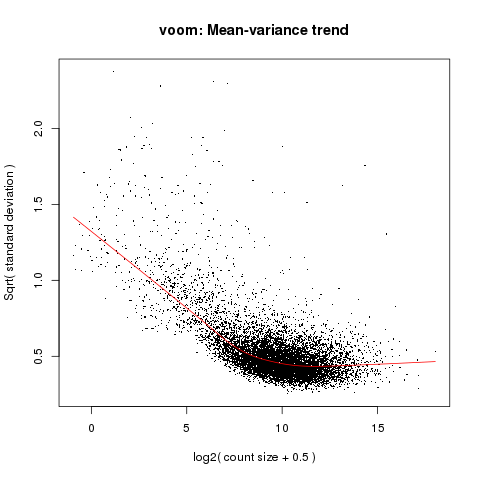

In [22]:
%%R
C <- read.delim("GSE88801_kallisto_est_counts_thresh10.txt",row.names=1)
dge <- DGEList(counts=C)
dge <- calcNormFactors(dge)
v <- voom(dge, d, plot = TRUE)

In [25]:
s = set(("A","b","C","C"))

In [26]:
s

{'A', 'C', 'b'}

In [27]:
"A" in s

True

In [28]:
"E" in s

False

In [29]:
if(1 == 1):
    print("hi")
else:
    print("there")

hi


In [30]:
if("A" in s):
    print("hi")
else:
    print("there")

hi
